In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data[1].csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
#adding a new column for the line intercept and initializing with ones
#inserting a new column as first column
# df.insert(loc=0,column='theta0',value=1)
# df
df = np.array(df)
np.random.shuffle(df)
df

array([[1.381e+01, 2.375e+01, 9.156e+01, 5.978e+02, 1.323e-01, 0.000e+00],
       [1.150e+01, 1.845e+01, 7.328e+01, 4.074e+02, 9.345e-02, 1.000e+00],
       [1.434e+01, 1.347e+01, 9.251e+01, 6.412e+02, 9.906e-02, 1.000e+00],
       ...,
       [1.348e+01, 2.082e+01, 8.840e+01, 5.592e+02, 1.016e-01, 0.000e+00],
       [9.738e+00, 1.197e+01, 6.124e+01, 2.885e+02, 9.250e-02, 1.000e+00],
       [1.607e+01, 1.965e+01, 1.041e+02, 8.177e+02, 9.168e-02, 0.000e+00]])

In [4]:
for i in range(df.shape[0]):
    if df[i,-1]==0: df[i,-1]=-1

In [5]:
#splitting the dataset into training and testing set
r = df.shape[0]
c = df.shape[1]
#df = np.array(df)
idx = 8*r//10
x_train = df[:idx,:c-1]
y_train = df[:idx,-1]
x_test  = df[idx:,:c-1]
y_test  = df[idx:,-1]
print("x training data:")
print(x_train,end="\n\n")
print("y training data:")
print(y_train,end="\n\n")
print("x testing data:")
print(x_test,end="\n\n")
print("y testing data:")
print(y_test)

x training data:
[[1.381e+01 2.375e+01 9.156e+01 5.978e+02 1.323e-01]
 [1.150e+01 1.845e+01 7.328e+01 4.074e+02 9.345e-02]
 [1.434e+01 1.347e+01 9.251e+01 6.412e+02 9.906e-02]
 ...
 [1.500e+01 1.551e+01 9.745e+01 6.845e+02 8.371e-02]
 [1.768e+01 2.074e+01 1.174e+02 9.637e+02 1.115e-01]
 [2.013e+01 2.825e+01 1.312e+02 1.261e+03 9.780e-02]]

y training data:
[-1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
 -1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1.
  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. 

In [6]:
#normalizing the data
for c in range(x_train.shape[1]):
        min_train = np.min(x_train[:,c])
        max_train = np.max(x_train[:,c])
        x_train[:,c]=(x_train[:,c]-min_train)/(max_train-min_train)
        x_test[:,c]=(x_test[:,c]-min_train)/(max_train-min_train)
print(x_train,end="\n\n")
print(x_test)

[[0.32320507 0.58257261 0.33010849 0.19270414 0.71923806]
 [0.21387666 0.3626556  0.20378688 0.11194062 0.36851133]
 [0.34828908 0.1560166  0.33667335 0.21111347 0.41915681]
 ...
 [0.37952577 0.2406639  0.37081059 0.22948038 0.28058138]
 [0.50636566 0.45767635 0.50867252 0.34791092 0.53146159]
 [0.62232003 0.76929461 0.60403566 0.47401909 0.40778189]]

[[0.12239103 0.25726141 0.11346832 0.05773065 0.28897716]
 [0.27398362 0.48547718 0.26418354 0.15435843 0.31470615]
 [0.2408538  0.15477178 0.23522908 0.12797455 0.51792001]
 [0.16986133 0.43609959 0.18215742 0.0826299  0.34395594]
 [0.36438071 0.43236515 0.35208348 0.22948038 0.415636  ]
 [0.27871646 0.40788382 0.26867528 0.15512195 0.34964341]
 [0.15518955 0.10414938 0.15175178 0.07554613 0.42728175]
 [0.25883856 0.24854772 0.26798424 0.14150583 0.67861334]
 [0.30806001 0.52240664 0.29797526 0.17709438 0.31497698]
 [0.43868617 0.406639   0.45615369 0.28517497 0.45111492]
 [0.37905249 0.51452282 0.37136342 0.23338282 0.29358129]
 [0.650

In [7]:
#converting the training and testing datasets into numpy arrays
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [8]:
# Using hinge loss function
# def hypothesis(x,w):
#     return np.dot(x,w)


def grad_descent(x,y,reg,alpha,epoch):
    r=x.shape[0]
    c=x.shape[1]
    w = np.ones((c,1))
    b=0
    min_w=[]
    min_b=None
    min_cost=None
    cost_list=[]
    for itr in range(epoch):
        cost = reg*np.dot(w.T,w)
        for i in range(r):
            if y[i]*np.dot(x[i],w)<1:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j]-y[i]*x[i,j])
                b-=alpha*y[i]*-1
            else:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j])
                cost+= 1-y[i]*np.dot(x[i],w)  
        #print(cost)
        cost_list.append(cost[0])
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_w=w
            min_b=b
            
    return min_w,min_b,np.array(cost_list)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')
    
def calAccuracy(pred,y_):
    correct=0
    for i in range(len(pred)):
        if pred[i]==y_[i]:
            correct+=1
    return correct*100/len(pred)

def predict(x_,y_,w,b):
    py = np.dot(x_,w)+b
    py=list(py)
    for i in range(len(py)):
        if py[i]>=1:
            py[i]=1
        else:
            py[i]=-1
    return py

def showPredictions(pred,y_):
    for i in range(len(pred)):
        print("predicted: ",pred[i],end='  ')
        print("actual: ",y_[i])

[[-1.0463736 ]
 [ 1.35639839]
 [-1.48118244]
 [-2.38132958]
 [ 2.64391883]] 792.759999999424
(1000, 1)
accuracy of model: 61.40350877192982%


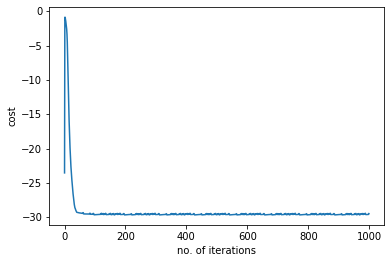

In [9]:
alpha = 0.01
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [10]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predic

[[-0.98667862]
 [ 1.19725993]
 [-1.42896035]
 [-2.31086643]
 [ 2.52488138]] 43.27999999999943
(1000, 1)
accuracy of model: 61.40350877192982%


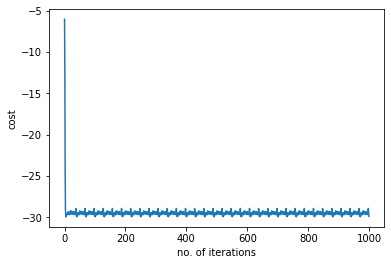

In [11]:
alpha = 0.08
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.95650564]
 [ 1.12435043]
 [-1.400399  ]
 [-2.28974116]
 [ 2.47028549]] 71.40000000000022
(1000, 1)
accuracy of model: 61.40350877192982%


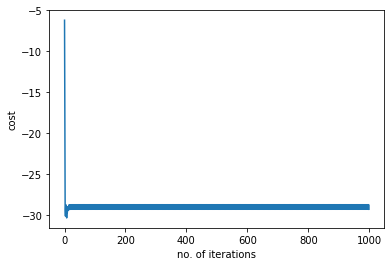

In [12]:
alpha = 0.1
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.19823216]
 [ 0.26203657]
 [-0.24136202]
 [-0.34099361]
 [ 0.59060339]] 10.999999999999977
(1000, 1)
accuracy of model: 61.40350877192982%


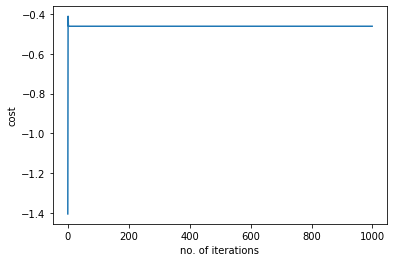

In [13]:
alpha = 0.1
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.0199344 ]
 [ 0.02869847]
 [-0.02426726]
 [-0.03445244]
 [ 0.05986037]] 1.0700000000000007
(1000, 1)
accuracy of model: 61.40350877192982%


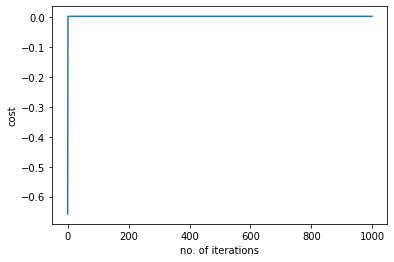

In [14]:
alpha = 0.01
epoch = 1000
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [15]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predic

[[-0.28531367]
 [ 0.39569564]
 [-0.32908854]
 [-0.44663318]
 [ 0.62678807]] 0.4800000000000003
(1000, 1)
accuracy of model: 38.59649122807018%


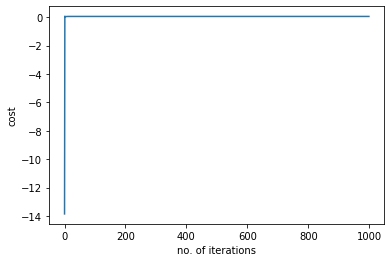

In [16]:
alpha = 0.01
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[-0.00696673]
 [-0.00748642]
 [-0.00708318]
 [-0.00669124]
 [ 0.00268789]] 2.3599999999999937
(1000, 1)
accuracy of model: 61.40350877192982%


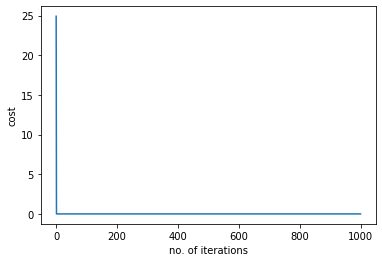

In [17]:
alpha = 0.01
epoch = 1000
reg = 5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [18]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  -1.0
predicted:  1  actual:  1.0
predic

[[-0.56566138]
 [-0.67822096]
 [-0.55159072]
 [-0.4270144 ]
 [-0.39884255]] 207.20000000000078
(500, 1)
accuracy of model: 61.40350877192982%


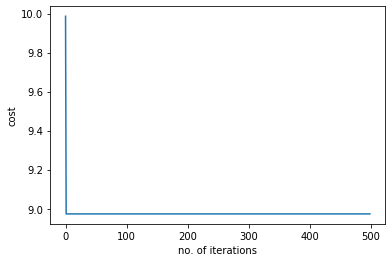

In [19]:
alpha = 0.8
epoch = 500
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")